In [107]:
# Author: Joonyl
# Date: 2023/09/25
# Description: Petit code pour commencer à faire un peu de ML

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#========================Chargement et mise en forme des données=============================#

#Charger les csv
gdp_df = pd.read_csv('data_ML/gdp_per_capita.csv', usecols=[0, 4], skiprows=1, names=['Country', 'GDP per Capita'], na_values=['..'])
happiness_df = pd.read_csv('data_ML/happiness.csv', delimiter=';', usecols=['Country', 'Happiness score'])

# Fusionner les deux DataFrames sur la colonne 'Country'
merged_df = pd.merge(gdp_df, happiness_df, on='Country')

# Supprimer les lignes où les données sont manquantes
cleaned_df = merged_df.dropna(subset=['GDP per Capita', 'Happiness score'])

#=======================End:Chargement et mise en forme des données==========================#

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                    Country  GDP per Capita  Happiness score
1                   Albania     6802.804519            5.199
2                   Algeria     4273.922183            5.122
3                 Argentina    13686.008674            5.967
4                   Armenia     7014.206592            5.399
5                 Australia    64491.429886            7.162
6                   Austria    52131.446659            7.163
7                   Bahrain    30152.034684            6.647
8                Bangladesh     2688.303950            5.155
9                   Belgium    49582.825365            6.805
10                    Benin     1303.222014            4.623
11                  Bolivia     3523.273733            5.600
12   Bosnia and Herzegovina     7585.375002            5.768
13                   Brazil     8917.673898            6.293
14                 Bulgaria    13772.476794            5.371
15             Burkina Faso      832.884266            4.670
16                 Cambo

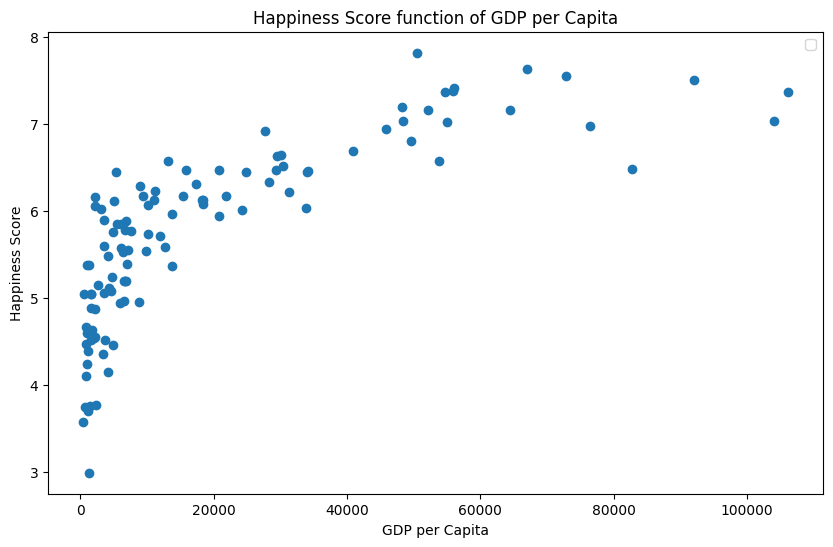

In [108]:
#===========================Affichage des données==========================#

#Affichage du df
print(cleaned_df)

#Affichage des datas sous forme de graphe
x = cleaned_df['GDP per Capita'].values.reshape(-1, 1)
y = cleaned_df['Happiness score'].values
# Tracé du graphique scatter et de la courbe de prédiction
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title('Happiness Score function of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(loc='best')
plt.show()

#En voyant les données, on fait l'hypothèse que happiness est logarithmique en fonction de gdp per capita
#=======================End:Affichage des données==========================#

In [109]:
#===========================Création du modèle log==========================#

# Transformation logarithmique de la variable 'GDP per Capita'
cleaned_df['log_GDP_per_Capita'] = np.log(cleaned_df['GDP per Capita'])

# Définir les variables indépendantes et dépendantes
X = cleaned_df[['log_GDP_per_Capita']]
y = cleaned_df['Happiness score']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs de 'Happiness score' pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer et afficher l'erreur quadratique moyenne pour les prédictions
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#=======================End:Création du modèle log==========================#

Mean Squared Error: 0.3271611208157254


C:\Users\jonax\AppData\Local\Temp\ipykernel_59440\3599636818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['log_GDP_per_Capita'] = np.log(cleaned_df['GDP per Capita'])


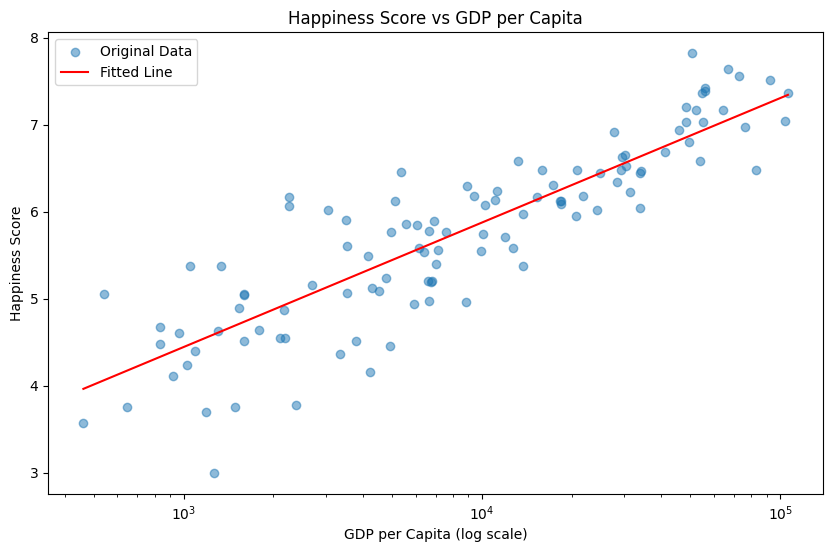

[6.58243084]


C:\Users\jonax\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [110]:
#===========================Affichage de nos résultats de modèle==========================#

# Tracer le graphe
plt.figure(figsize=(10,6))
plt.scatter(cleaned_df['GDP per Capita'], cleaned_df['Happiness score'], alpha=0.5, label='Original Data')
plt.plot(cleaned_df.sort_values('GDP per Capita')['GDP per Capita'], 
         model.predict(cleaned_df.sort_values('log_GDP_per_Capita')[['log_GDP_per_Capita']]), 
         color='red', label='Fitted Line')
plt.xscale('log')
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita (log scale)')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

#=======================End:Affichage de nos résultats de modèle==========================#

#===========================Prédiction à l'aide du modèle log==========================#

#gdp per capita de chypre
gdp_cyprus = 31283.505859375  

#Prédiction de la happiness de Chypre
predicted_happiness = model.predict([[np.log(gdp_cyprus)]])
print(predicted_happiness)#On a 6.58243084 alors qu'on attend une valeur de 6.221

#On va essayer avec un autre modèle de pr
#=======================End:Prédiction à l'aide du modèle log==========================#

In [111]:
#===========================Création du modèle k-NN==========================#

#Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entraîner le modèle k-NN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
#Évaluer le modèle
y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#=======================End:Création du modèle k-NN==========================#

#===========================Prédiction avec k-NN==========================#

#gdp per capita de chypre
gdp_cyprus = np.array([[31283.505859375]])

#Prédiction de la happiness de Chypre
new_value_scaled = scaler.transform(gdp_cyprus)
predicted_happiness = knn.predict(new_value_scaled)
print(f'Predicted Happiness Score for GDP per Capita of Cyprus: {predicted_happiness[0]}')

#Conclusion:Nos 2 modèles sont bancals
#=======================End:Prédiction avec k-NN==========================#

Mean Squared Error: 0.4314152636363639
Predicted Happiness Score for GDP per Capita of Cyprus: 7.1781999999999995


C:\Users\jonax\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
